In [52]:
%load_ext autoreload
%autoreload 2
from Project import Project

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

import os

## BETA Dataset

Sample function : $$ s(f, \Phi, i) = \dfrac{\sin{[2\pi f (i/\text{RefreshRate}) + \Phi]}}{2} $$

where $\text{RefreshRate} = 60 Hz$ and the indexed frequency and phase values can be obtained by

$$ f_k = f_0 + (k-1)\cdot \Delta f \\ \Phi_k = \Phi_0 + (k - 1)\cdot \Delta \Phi$$

for $f_0 = 8 Hz, \Phi_0 = 0$ and $\Delta f = 0.2 Hz, \Delta \Phi = 0.5 \cdot \pi$

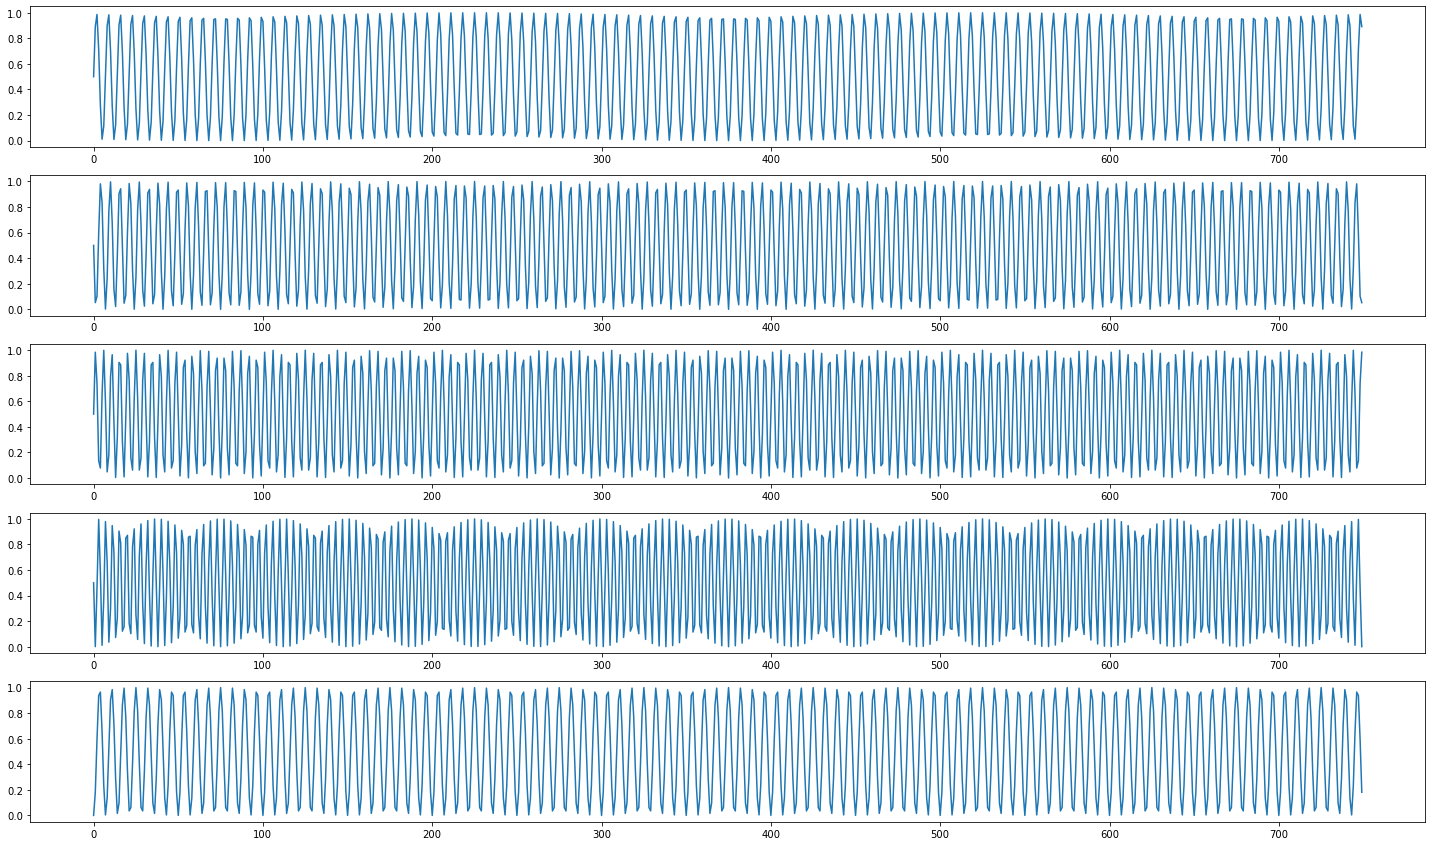

In [6]:
frequency = np.array([ 8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6,10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. ,
                      14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8,  8. ,  8.2,  8.4])
phases = np.array([0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 
                   3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 
                   0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898])

signal_length = 750
stimulus_matrix = np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phases)]) # This will be used later after i parsed the information of each subject
# stimulus_matrix = np.array([stimulus(f_k(k), phi_k(k), signal_length) for k in range(1, 40 + 1)])

fig, ax = plt.subplots(nrows = 5, ncols = 1)
fig.set_size_inches(25, 15)

ax[0].plot(range(signal_length), stimulus_matrix[0])
ax[1].plot(range(signal_length), stimulus_matrix[10])
ax[2].plot(range(signal_length), stimulus_matrix[20])
ax[3].plot(range(signal_length), stimulus_matrix[30])
ax[4].plot(range(signal_length), stimulus_matrix[39])

In [55]:
def saveSeparatedFiles():
    files = [file for file in os.listdir(Project.tsinghua_raw_dir) if "mat" in file]
    for s in range(len(files)):
        path  = Project.tsinghua_raw_dir / files[s]
        data, subject_info = getData(path)
        for b in range(4):
            for t in range(40):
                X = data[:, :, b, t].T
                output_directory = Project.tsinghua_raw_dir / 'separated' / str()
                np.savetxt(Project.tsinghua_raw_dir / 'separated' / str(t+1) / "S{}_{}.csv".format(s+1, b+1), X)
                
class subjectInfo():
    def __init__(self, subject):
        self.data = [x for x in subject[1][0][0]]
        
    def getID(self):
        return self.data[0].item()
    
    def getAge(self):
        return self.data[1].item()
        
    def getGender(self):
        return self.data[2].item()
        
    def getElectrodes(self):
        electrodes_id = list(range(1, 65))
        data = pd.DataFrame(index = list(range(1, 65)), columns = ['Name', 'x', 'y'])
        for i in range(64):
            d = self.data[3][i][1].astype(np.float64).item()
            r = self.data[3][i][2].astype(np.float64).item()
            name = self.data[3][i][3].item()
            data.loc[i+1] = [name, x, y]
            
        return data
        
    def getFrequencies(self):
        return self.data[4][0]
    
    def getPhases(self):
        return self.data[5][0]
    
    def getVal1(self):
        return self.data[6][0]
        
    def getVal2(self):
        return self.data[7][0]
        
    def getVal3(self):
        return self.data[8][0]
        
    def getSamplingRate(self):
        return self.data[9][0]
    
def getData(path):
    subject = scipy.io.loadmat(path)['data'][0][0]
    return subject[0], subjectInfo(subject)

In [28]:
# saveSeparatedFiles()

In [56]:
files = [file for file in os.listdir(Project.tsinghua_raw_dir) if "mat" in file]
path  = Project.tsinghua_raw_dir / files[0]

In [57]:
data, subject_info = getData(path)

### CCA

In [ ]:
# %**************************************************************************
# %   Canonical Correlation Analysis
# %**************************************************************************
# function[canonCorrVectors, canonCorrCoefficients] = ...
#     canonCorrAnalysis(functionMatrix, dataMatrix)
# %--------------------------------------------------------------------------
# %
# %--------------------------------------------------------------------------
# numOfAttributes = size(functionMatrix, 2);
# ccaMatrix = cat(2, functionMatrix, dataMatrix);
# covMatrix = cov(ccaMatrix);
# covXX = covMatrix(1:numOfAttributes, 1:numOfAttributes);
# covYY = covMatrix(numOfAttributes + 1:end, numOfAttributes + 1:end);
# covXY = covMatrix(1:numOfAttributes, numOfAttributes + 1:end);
# invCovXX = covXX^(-1/2);
# invCovYY = covYY^(-1/2);
# Rn = invCovXX*covXY*invCovYY;
# [~, eigValues, eigVectorsYY] = svd(Rn);
# canonCorrCoefficients = diag(eigValues);
# canonCorrVectors = invCovYY*eigVectorsYY;
# %--------------------------------------------------------------------------
# end
# %**************************************************************************




In [60]:
from sklearn.cross_decomposition import CCA

In [67]:
from numpy.linalg import pinv

In [184]:
k = 250
def stimulus(f : [float], phi : [float], length : int) -> np.array:
    return np.array([0.5*( 1 + np.sin(2*np.pi*f*(i/k) + phi) ) for i in range(length)])
#     return np.array([[0.5*( 1 + np.sin(2*np.pi*f*(i/k) + phi) ) for i in range(length)],
#                      [0.5*( 1 + np.cos(2*np.pi*f*(i/k) + phi) ) for i in range(length)],
#                      [0.5*( 1 + np.sin(4*np.pi*f*(i/k) + phi) ) for i in range(length)],
#                      [0.5*( 1 + np.cos(4*np.pi*f*(i/k) + phi) ) for i in range(length)]])

# def f_k(k):
#     return 8 + (k - 1)*0.2
# def phi_k(k):
#     return 0 + (0.5*(k-1))%2*np.pi

In [185]:
normalize = lambda X: (X - np.mean(X, axis = 1)[:, np.newaxis]) / np.std(X, axis = 1)[:, np.newaxis]

In [186]:
block = 0
target = 0
X = data[:, :, block, target]
X = normalize(X)
X.shape

(64, 750)

In [187]:
frequency = subject_info.getFrequencies()
phase = subject_info.getPhases()
signal_length = X.shape[1]
stimulus_matrix = np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phase)])
# stimulus_matrix = np.concatenate(np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phase)]))

stimulus_matrix.shape

(40, 750)

In [215]:
cca = CCA(n_components=40)
cca.fit(X.T, stimulus_matrix.T)
X_c, stimulus_matrix_c = cca.transform(X.T, stimulus_matrix.T)
print(X_c.shape, stimulus_matrix_c.shape)

(750, 40) (750, 40)


In [216]:
Wx = cca.x_weights_
p_invWx = pinv(Wx)
print(Wx.shape, p_invWx.shape)

(64, 40) (40, 64)


In [217]:
# X_inv_map = np.dot(p_invWx.T, X_c.T)
X_inv_map = cca.inverse_transform(X_c).T
X_inv_map.shape

(64, 750)

In [218]:
X

array([[ 2.00199016,  2.46158973,  2.79635803, ...,  0.52748421,
         0.12425658, -0.71554381],
       [ 2.61267848,  2.80514656,  3.02128091, ...,  0.3014609 ,
         0.35414153,  0.32763552],
       [ 2.53836964,  2.47622909,  2.61014054, ...,  0.50734501,
         0.71836691,  0.30885342],
       ...,
       [ 0.35104818,  1.11135028,  0.79585601, ..., -1.22842841,
        -1.27782145, -1.0182387 ],
       [ 0.43070733,  0.43055506,  0.25094753, ..., -1.07221053,
        -2.0150503 , -1.77360256],
       [ 0.65501447,  0.71621989,  0.45409202, ..., -1.49951158,
        -1.26193119, -0.98857203]])

In [219]:
X_inv_map

array([[ 0.88783955,  1.37584483,  1.30125513, ..., -0.08848425,
        -0.11554204, -0.35624729],
       [ 1.88241636,  1.90989676,  1.31484068, ...,  0.12043673,
         0.46549454,  0.3372613 ],
       [ 2.34765022,  2.04462111,  1.46639491, ...,  0.20312108,
         0.61780279,  0.48363659],
       ...,
       [ 0.43476899,  0.25961453, -0.21370113, ..., -1.88394372,
        -1.22809177, -0.81630865],
       [ 0.48709456,  0.11817148, -0.48967621, ..., -1.6195427 ,
        -1.89917389, -1.66037483],
       [ 0.40220967,  0.20547216, -0.41359462, ..., -1.87940728,
        -1.29835628, -0.89114363]])

In [197]:
np.mean(np.abs(X - X_inv_map))

0.7806759693786149

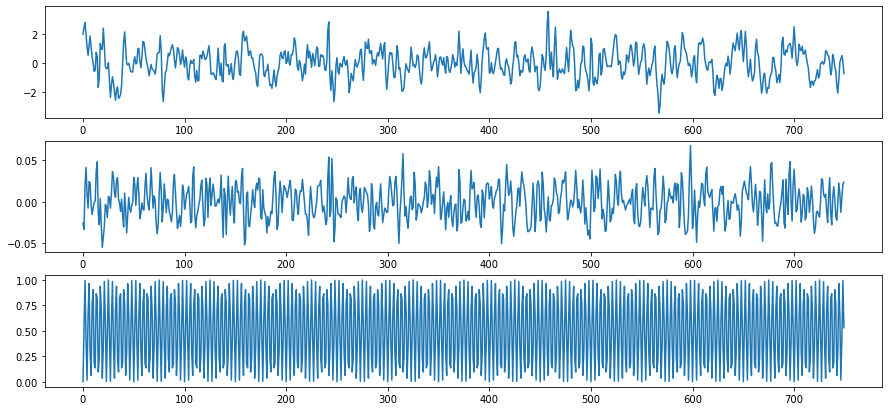

In [183]:
fig, ax = plt.subplots(nrows = 3, ncols = 1)

fig.set_size_inches(15, 7)

k = 35

ax[0].plot(range(len(X[0])), X[0])
ax[1].plot(range(len(X[0])), X_inv_map[0])
ax[2].plot(range(len(stimulus_matrix[k])), stimulus_matrix[k])

In [ ]:
from sklearn.cross_decomposition import CCA

def saveSeparatedFiles_CCA():
    cca = CCA(n_components=64)
    files = [file for file in os.listdir(Project.tsinghua_raw_dir) if "mat" in file]
    for s in range(len(files)):
        path  = Project.tsinghua_raw_dir / files[s]
        data, subject_info = getData(path)
        frequency = subject_info.getFrequencies()
        phase = subject_info.getPhases()
        for b in range(4):
            for t in range(40):
                X = data[:, :, b, t].T
                signal_length = X.shape[1]
                stimulus_matrix = np.concatenate(np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phase)]))
                cca.fit(X.T, stimulus_matrix.T)
                X_c, _ = cca.transform(X.T, stimulus_matrix.T)
                
                output_directory = Project.tsinghua_raw_dir / 'separated' / str()
                np.savetxt(Project.tsinghua_raw_dir / 'separated' / str(t+1) / "S{}_{}.csv".format(s+1, b+1), X_c)

***
### Testing Datasets Classes

In [44]:
from Scripts.data.BETADataset import BETADataset

In [45]:
dataset = BETADataset(Project, list(range(1, 5 + 1)), list(range(1, 60 + 1)))

In [47]:
sample, target = next(iter(dataset))

In [48]:
import matplotlib.pyplot as plt